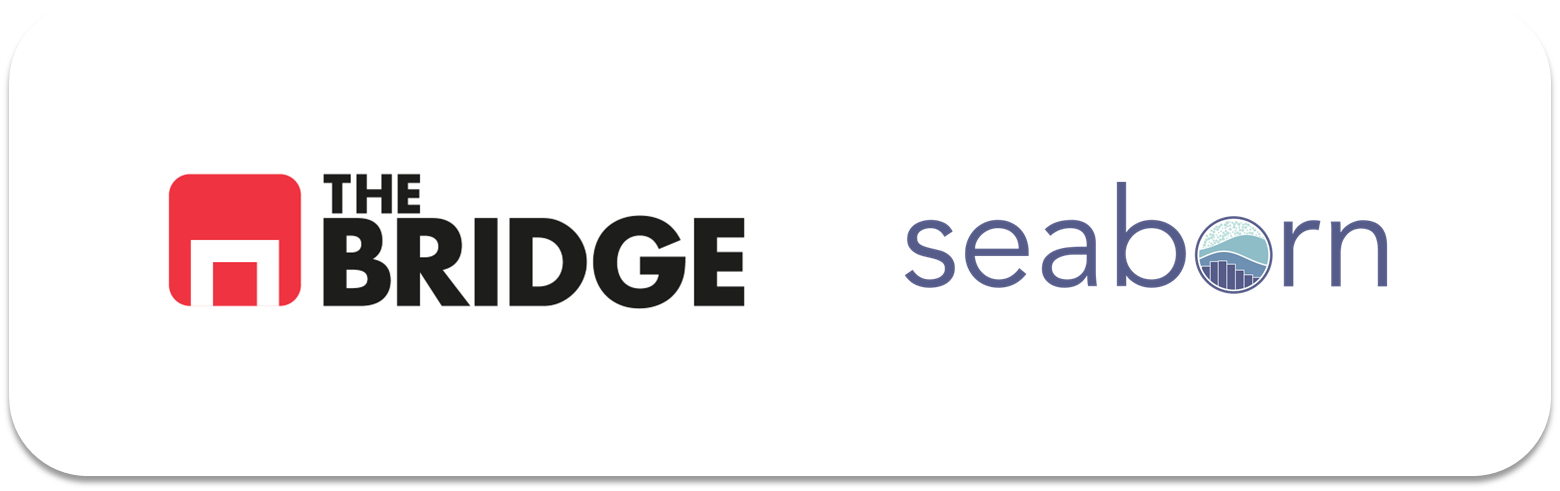

# Visualización Aplicada: Intro a Seaborn

En las siguientes sesiones vamos a ver de una forma más aplicada qué visualización podemos aplicar en función de los datos que necesitemos mostrar o queramos mostrar. Aprovecharemos además para mostrar como hacer la mayoría de esas visualizaciones con otra librería que debes conocer y manejar: Seaborn.

En esta sesión vamos a ver unas consideraciones generales a tener en cuenta a la hora de mostrar (visualizar) tus datos en una presentación de los mismos y luego dedicaremos la mayoría de la misma a entender la relación entre seaborn y matplotlib y como usarlas de forma combinada.

### Consideraciones Generales en Visualización

* La visualización para el **análisis NO es** la visualización para **presentar el resultado** del análisis

Esto es lo primero que te tiene que quedar claro, y ¿por qué es así? 

+ Primero, porque **TIENEN OBJETIVOS DISTINTOS**. El análisis nos sirve para extraer información importante, respuestas a nuestras preguntas. La presentación de resultados tiene como objetivo como mostrar esa información de la forma más relevante para el destinatrario de esos resultados. Ojo, si el destinatario eres tú mismo... O no hace falta que hagas una presentación a ti mismo, o entonces tú no eres el destinatario del resultado :-). 

Segundo, porque generalmente **TIENEN PÚBLICOS DISTINTOS**. El análisis es para ti o para un grupo de colaboradores (el análisis no es para tus jefes, salvo que sea colaborador en el proyecto, si tienes que mostrar el análisis a jefes consideralo una Presentación aunque en esa sí puedas/debas enseñar mucho del cómo). La presentación es para el que ha encargado el proyecto, para convencer a un tercero, para informar, para quedar tú como el gran sultán de los datos (es decir para un conjunto de "espectadores"), etc, etc.

De lo anterior surgen dos primeras guías importantes para  las visualizaciones:

+ En una ánalisis tus visualizaciones pueden contener todos los datos comparados que tu cerebro pueda admitir. El límite lo pones tú o el grupo de trabajo.

+ En una presentación la cantidad de información de la visualización depende del objetivo de la presentación. Si:

    * Es una **presentación de resultados y conclusiones**: La visualización debe contener **uno o como mucho dos DATOS destacados**, el resto aparecer como complemento estético o comparativo (no importa el dato en sí sino lo que refuerza o debilita a los anteriores), **por mensaje**. Y esos dos DATOS no son cualesquiera son los que mejor y más apoyen el mensaje que quieres transmitir.

    * Es una **exposición** de los mismos, por ejemplo **una infografía**: Entonces debe contener la mayor cantidad de **datos relevantes**, expuestos de la forma más **clara, significativa y separada** posible. 


Nosotros no vamos a ver el segundo caso. Para el arte de hacer infografías y EXPONER datos, algunas referencias: [Edward Tufte](https://es.wikipedia.org/wiki/Edward_Tufte) y su [página web](https://www.edwardtufte.com/), y una lista de blogs de infografías y visualizaciones expositivas, [aquí](https://www.webdatarocks.com/blog/top-data-visualization-blogs-to-follow/)

En las siguientes píldoras vamos a trabajar sobre la premisa de que queremos presentar nuestras conclusiones, no los datos. Pero **IMPORTANTE**: eso no quita que tus presentaciones lleven unos pedazo de anexos con todas las gráficas y datos, para cuando alguien pregunte. 

### Seaborn y Matpotlib

**Seaborn** es una biblioteca de visualización de datos en Python que está construida sobre Matplotlib. Se puede considerar como una extensión o un "wrapper" de Matplotlib que proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos y más informativos. Como matplotlib y pandas, con los que se lleva de maravilla, tiene su propio alias (que ya conoces). Empecemos las importaciones:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


[Ahí tienes a la banda más famosa de librerías python para DataScience no diré que básico pero sí ya "tradicional"]

Y cargamos unos datos para pintar:

In [2]:
df = pd.read_csv('./data/titanic.csv')

* Matplotlib es muy potente y fexible, pero Seaborn tiene una interfaz más accesible y estilos por defecto que son visualmente más atractivos. Seaborn integra de manera más profunda las estructuras de datos de Pandas y agrega capacidades de visualización estadística. Esto incluye funciones para crear gráficos complejos con menos código, como gráficos de distribución, matrices de correlación y muchos más. Por ejemplo, generar un gráfico de violín o un mapa de calor es más sencillo y directo con Seaborn.

* Además Seaborn nació con Pandas en la cabeza y facilita la visualización directa de DataFrames de Pandas, lo que es ideal para el análisis de datos.

¿Entonces si vamos a pasarnos a Seaborn, para qué una unidad entera de Matplotlib?, te preguntarás. Pues porque vamos a usar los dos conjuntamente:

* Usaremos Matplotlib para crear los subplots y ajustar los gráficos creados con Seaborn, ya que las figuras de Seaborn son, en el fondo, figuras de Matplotlib. Y luego usaremos los métodos de Matplotlib para personalizar los gráficos de Seaborn, como modificar los ejes, añadir títulos, etiquetas, y mucho más.

Veamos dos ejemplos de como los usaremos (y de cómo los hemos estado usando ya):

#### Ejemplo 1: *Pinta Seaborn, decora Matplotlib*

Text(0, 0.5, 'fare')

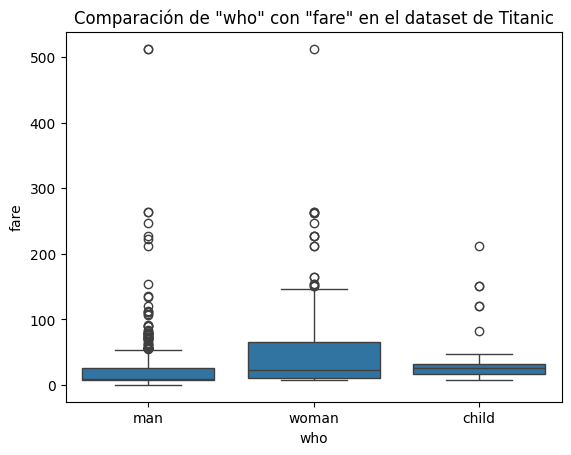

In [3]:
sns.boxplot(x = 'who', y = 'fare', data = df)

plt.title('Comparación de "who" con "fare" en el dataset de Titanic')
plt.xlabel('who')
plt.ylabel('fare')


#### Ejemplo 2: *Configura Matplotlib, pinta Seaborn*

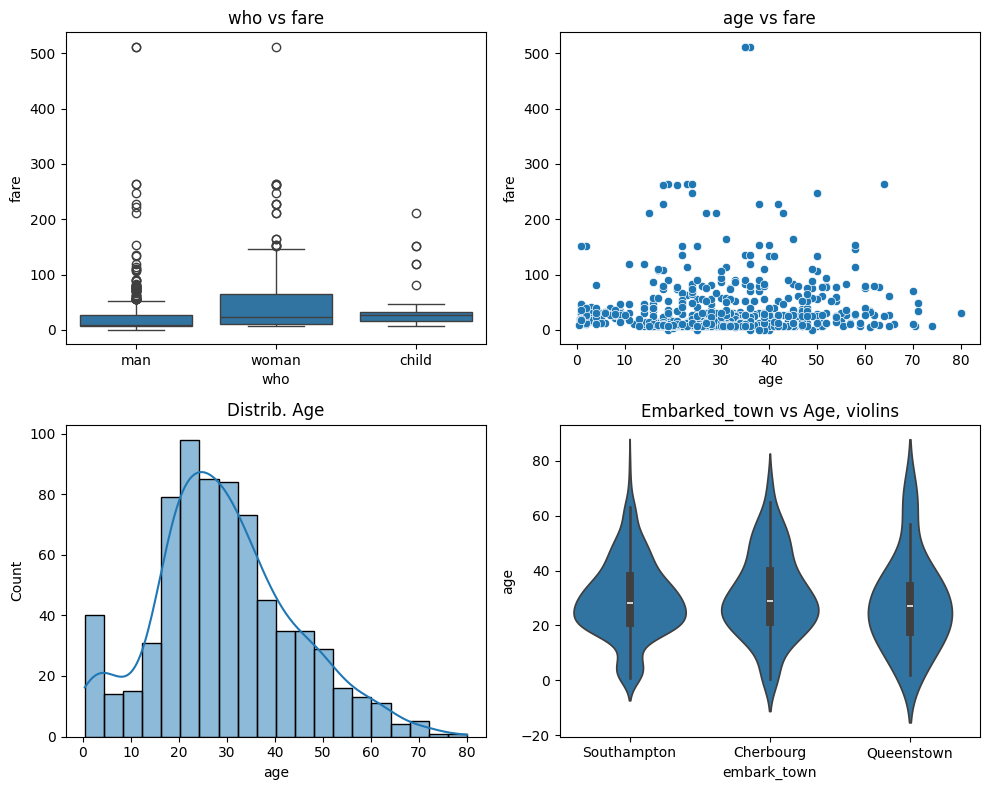

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Primer subplot con un gráfico de Seaborn
sns.boxplot(x='who', y='fare', data=df, ax=axs[0, 0])

# Segundo subplot con otro gráfico de Seaborn
sns.scatterplot(x='age', y='fare', data=df, ax=axs[0, 1])

# Tercer subplot
sns.histplot(df['age'], kde=True, ax=axs[1, 0])

# Cuarto subplot
sns.violinplot(x='embark_town', y='age', data=df, ax=axs[1, 1]);

axs[0,0].set_title("who vs fare")
axs[0,1].set_title("age vs fare")
axs[1,0].set_title("Distrib. Age")
axs[1,1].set_title("Embarked_town vs Age, violins")

plt.tight_layout()


### Estructura de las sesiones:

Las siguientes sesiones dedicadas a Seaborn se agrupan según necesitemos mostrar datos de una única variable, de dos variables y de más de dos variables. Además se estructuran sobre un mismo esquema (aunque con las variaciones necesarias). Este esquema consiste en:

1. Dar una lista de gráficas/visualizaciones que se van a enseñar.
2. Dar una guías de en qué circunstancias utilizar unas visualizaciones o no.
2. Recorrer la lista:
    * Indicando cuándo se debe usar o no en que condiciones y si hay algún uso "mixto"
    * Mostrando la sintaxis en seaborn para generarla con ejemplos de uso
    * Comentario sobre los parámetros principales



### Un último "consejo" antes de empezar: Cuando quieres (o no tienes más que) mostrar un único valor

Cuando tenemos un único dato, número, valor que mostrar tenemos que tener muy claro cuál es el mensaje. Por que un único dato NO APORTA NADA de por sí... Ojo salvo que sepas que tu público o la audiencia de la presentación lo va a comparar con algo que tenga en la cabeza. Si ese es el caso, entonces cuidado porque cada persona es un mundo y lo va a comparar con una referencia que dependerá de mil variables (su origen, contexto, situación personal, etc, etc). 

Mi consejo es que siempre lo compares con algo en función de lo que quieras transmitir: Si quieres que parezca grande compáralo con algo pequeño, y viceversa. Si en realidad tú ya sabes que el dato es importante por su comparación con otro dato, trae ese a colación bien en tu discuroso o bien poniendo ambos juntos. Por ejemplo:

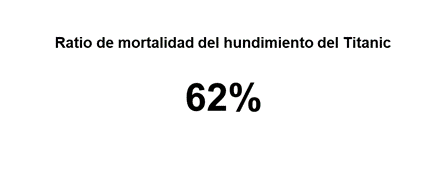

Está bien, pero así cada uno sacará su propia conclusión (igual es lo que quieres)

Frente a:

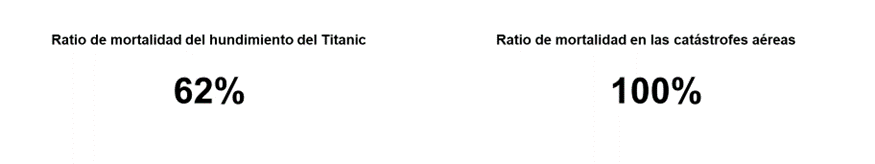

Además si sólo tienes un número o dos, quizás te convenga no usar el número si uno un dibujo que refuerce el mensaje (en este "macabro" caso 6 tumbas y 4 personas para la izquierda, 10 tumbas para la derecha), veremos algunos ejemplos cuando hablemos del "powerpoint" entre comillas:

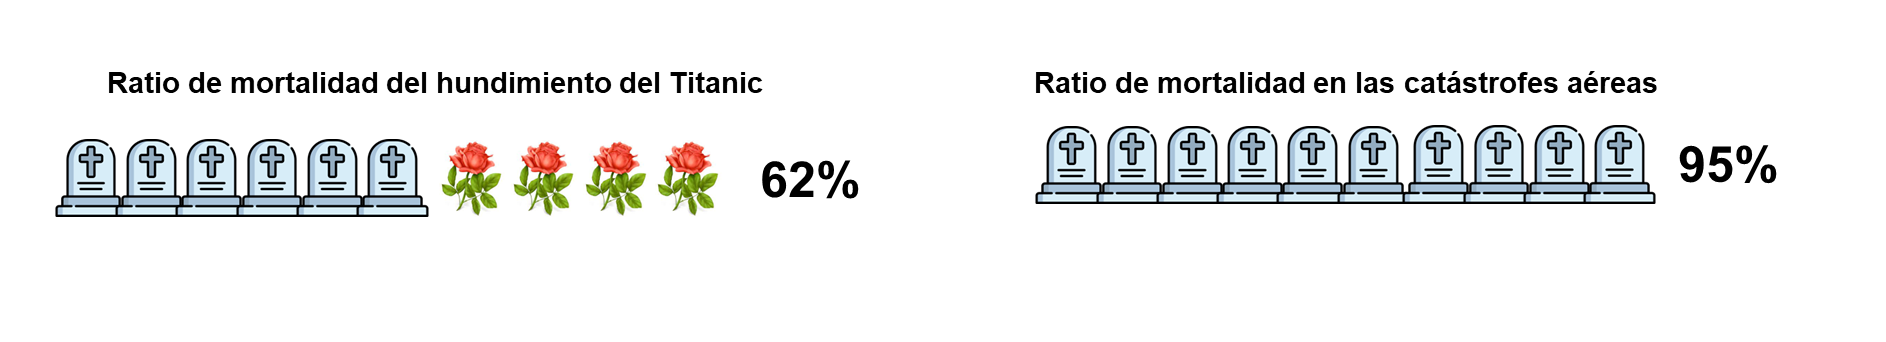